Preâmbulo

In [261]:
# Inteligência Artificial
# Alunos: Helon e Tiago

import pandas as pd # para manipulação e análise de dados
import numpy as np # computação científica - utilizada nas curvas gaussinas

import matplotlib.pyplot as plt # para geração de gráficos

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc # para a matrix de confusão


In [262]:
# Bibliotecas específicas para o aprendizado de máquina
from sklearn.model_selection import train_test_split # permite dividir o conjunto de dados em TREINAMENTO E TESTE
from sklearn.metrics import r2_score # a métrica "r quadrado" permite sabermos o quão eficiente foi um modelo que nós treinamos


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score

# Importar a biblioteca para busca de hiperparâmetros com algoritmos genéticos
from geneticalgorithm import geneticalgorithm as ga


# EXTRA (NÃO FOI PEDIDO NO TRABALHO, APENAS PARA FINS DE MEU CONHECIMENTO)
# EU SEI QUE "RL" NÃO É INDICADO PARA CLASSIFICAÇÃO BINÁRIA, mas sim para prever valores contínuos com base em variáveis independentes
from sklearn.linear_model import SGDRegressor # modelo de aprendizado de máquina: regressão linear
# ^ utiliza descida do gradiente estocástico (Cálculo 2*...?) # Fim do extra.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from geneticalgorithm import geneticalgorithm as ga


Carregamento do Dataset

In [264]:
dataset = pd.read_csv("D:\\Users\\tiago\\OneDrive\\SI UFRRJ\\5p\\Inteligencia Artificial\\Trabalhos\\Trabalho 5 - Redes Neurais Art e Tratamento de Dados\\Fase 2\\Dados escolhidos (veio la da Fase 1)\\dados_escolhidos (copia Fase 1).csv", sep = ";")
# Substitua 'id' pelo nome correto da primeira coluna que você deseja remover
dataset = dataset.iloc[:, 1:] # removendo a primeira coluna: seleciona todas as linhas (indicadas pelo :) e todas as colunas a partir da segunda coluna (índice 1 em diante)

In [265]:
dataset.head()

,V1,V2,V7,V8,V12,V14,V15
0,0.192459,0.050191,0.397059,0.131057,0.005847,0.635945,1.0
1,0.303054,0.315094,0.779412,0.509340,0.007254,0.456221,1.0
2,0.002424,0.521228,0.602941,0.050738,0.005275,0.239631,1.0
3,0.014140,0.427120,0.794118,0.358853,0.005671,0.410138,1.0
4,0.260720,0.172144,0.838235,0.193550,0.007386,0.797235,1.0


In [266]:
# Dividindo em conjunto de treinamento e teste (30% dos dados será para teste -> test_size = 0.3)
V1_norm_train, V1_norm_test, V2_norm_train, V2_norm_test, V7_norm_train, V7_norm_test, V8_norm_train, V8_norm_test, V12_norm_train, V12_norm_test, V14_norm_train, V14_norm_test = train_test_split (dataset['V1'], dataset['V2'], dataset['V7'], dataset['V8'], dataset['V12'], dataset['V14'], test_size=0.3)


# Crie um DataFrame contendo todas as colunas de entrada
x_train = pd.DataFrame({
    'V1': V1_norm_train,
    'V2': V2_norm_train,
    'V7': V7_norm_train,
    'V8': V8_norm_train,
    'V12': V12_norm_train,
    'V14': V14_norm_train
})

# Previsão do conjunto de teste
x_test = pd.DataFrame({
    'V1': V1_norm_test,
    'V2': V2_norm_test,
    'V7': V7_norm_test,
    'V8': V8_norm_test,
    'V12': V12_norm_test,
    'V14': V14_norm_test
})


# Y é a sáida, o resultado esperado. Que aqui, é a classe (-> a coluna 'V15' que representa as classes).
y_train = dataset.loc[x_train.index, 'V15']
y_test = dataset.loc[x_test.index, 'V15'] # Calcule a variável de saída real para o conjunto de teste (Y_test)

Achando melhores parâmetros iniciais

In [267]:
# Aqui entrará o código

Processamento

In [268]:
# A melhor função de ativação para a maioria dos casos não é a sigmóide ("logistic") MAS SIM a "reLU" !

# Crie a instância do classificador MLP
rna = MLPClassifier(hidden_layer_sizes = (10,5), max_iter = 2000, tol = 0.0000001,
learning_rate_init = 0.1, solver ="sgd", activation = "relu", learning_rate = "constant", verbose = 2 ) # (nº de camadas escondidas (tupla: qntd neurônios camd 1, neur camd 2 ) , nº máx de iterações/épocas , tolerância da melhora limite do erro , estratégia = descida gdt estocástico , função de ativação, taxa constante )        - Rede neural artificial de multiplas camadas
# verbose: para podermos ver o que está acontecendo em cada época

In [269]:
# Treine o modelo
rna.fit(x_train, y_train)

Iteration 1, loss = 0.67334063
Iteration 2, loss = 0.66066879
Iteration 3, loss = 0.64970362
Iteration 4, loss = 0.64046358
Iteration 5, loss = 0.63361707
Iteration 6, loss = 0.62902379
Iteration 7, loss = 0.62641768
Iteration 8, loss = 0.62528074
Iteration 9, loss = 0.62521098
Iteration 10, loss = 0.62577760
Iteration 11, loss = 0.62639315
Iteration 12, loss = 0.62693710
Iteration 13, loss = 0.62722744
Iteration 14, loss = 0.62747593
Iteration 15, loss = 0.62764731
Iteration 16, loss = 0.62771134
Iteration 17, loss = 0.62766800
Iteration 18, loss = 0.62752701
Iteration 19, loss = 0.62727622
Iteration 20, loss = 0.62694622
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate_init=0.1, max_iter=2000,
              solver='sgd', tol=1e-07, verbose=2)

EXTRA: REGRESSÃO LINEAR ---

In [270]:
#EXTRA:
# Sei que não é o certo. É só uma "prática" extra
reglinear = SGDRegressor(max_iter = 2000, tol = 0.0000001, eta0=0.1, learning_rate = "constant", verbose = 2 ) # SGD significa Stochastic Gradient Descent = descida do gradiente estocástico (é um algoritmo de otimização) #EXTRA


reglinear.fit(x_train, y_train) #EXTRA.
# Fim do extra.

-- Epoch 1
Norm: 0.35, NNZs: 6, Bias: 0.606016, T: 113, Avg. loss: 0.128502
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 6, Bias: 0.584326, T: 226, Avg. loss: 0.112549
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.54, NNZs: 6, Bias: 0.584819, T: 339, Avg. loss: 0.105724
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.68, NNZs: 6, Bias: 0.695225, T: 452, Avg. loss: 0.108314
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.75, NNZs: 6, Bias: 0.606671, T: 565, Avg. loss: 0.108035
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 6, Bias: 0.719244, T: 678, Avg. loss: 0.107246
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.89, NNZs: 6, Bias: 0.773778, T: 791, Avg. loss: 0.106401
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.90, NNZs: 6, Bias: 0.663229, T: 904, Avg. loss: 0.104666
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.89, NNZs: 6, Bias: 0.694339, T: 1017, Avg. loss: 0.103885
Total training time: 0.00 seconds.


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

^ FIM DO EXTRA (ACIMA). ---

Pós-processamento

In [271]:
# Previsão do conjunto de teste (com as variáveis separadas para esse "teste" - "posterior")

y_rna_previsao = rna.predict(x_test)


In [272]:
# EXTRA: regressão linear
y_rl_previsao = reglinear.predict(x_test) #EXTRA
# Fim do extra.

In [273]:
# Calcular o R^2 (R Quadrado - eficiência)

r2_rna = r2_score(y_test, y_rna_previsao)
print ("R2 RNA:", r2_rna)


R2 RNA: -0.75


In [274]:
# EXTRA: regressão linear
r2_rl = r2_score(y_test, y_rl_previsao) #EXTRA
print ("R2 RL:", r2_rl) #EXTRA
# Fim do extra.

R2 RL: 0.1547010548483464


Gráficos (RNA apenas):

In [275]:
# Carregando os dados originais (sem dados espúrios, pré-normalização) de outra planilha/arquivo
dados_originais = pd.read_csv("D:\\Users\\tiago\\OneDrive\\SI UFRRJ\\5p\\Inteligencia Artificial\\Trabalhos\\Trabalho 5 - Redes Neurais Art e Tratamento de Dados\\Fase 1\\Dados normalizados\\dados_sem_espurios.csv", sep = ";") # "\t" Tabulação que separa

# Extraindo as colunas que correspondem às features usadas no treinamento
x_originais = dados_originais[['V1', 'V2', 'V7', 'V8', 'V12', 'V14']]

y_originais_rna_previsao = rna.predict(x_originais) # prevendo as classes usando a RNA para os dados originais

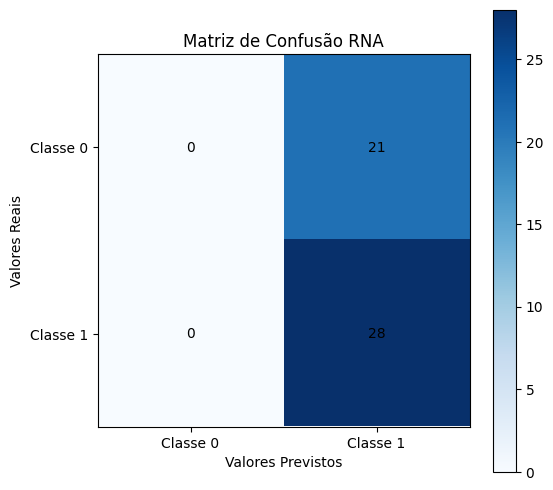

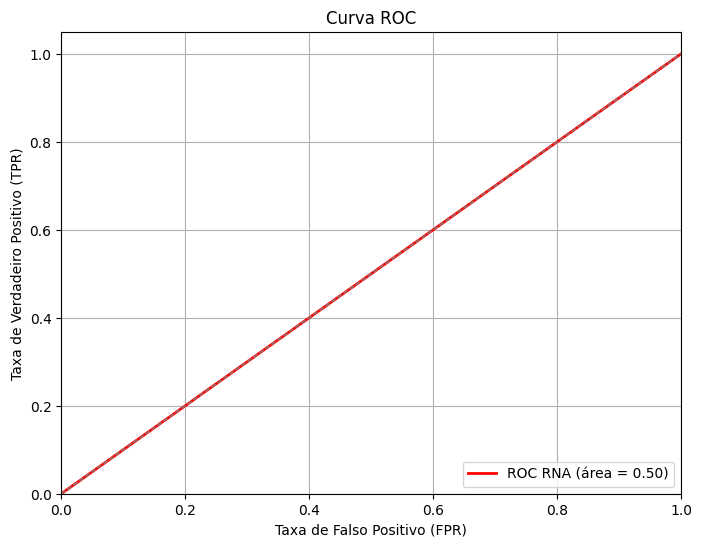

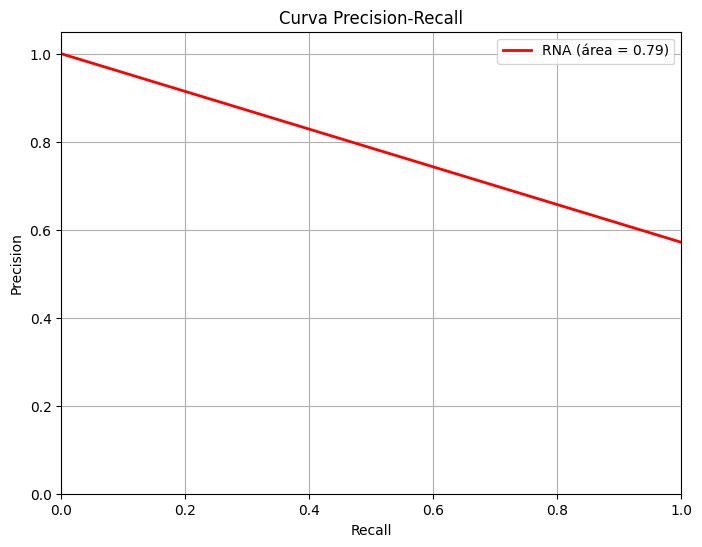

In [276]:

# IMAGENS - PAINEL

# Matriz de confusão
conf_matrix_rna = confusion_matrix(y_test, y_rna_previsao)

# Plot da matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rna, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão RNA')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'])
plt.yticks([0, 1], ['Classe 0', 'Classe 1'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_rna[i, j]), ha='center', va='center', color='white' if conf_matrix_rna[i, j] > 50 else 'black')

plt.colorbar()
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()

# Curva ROC
roc_auc_rna = roc_auc_score(y_test, y_rna_previsao)
fpr_rna, tpr_rna, _ = roc_curve(y_test, y_rna_previsao)

# Plot da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rna, tpr_rna, color='red', lw=2, label='ROC RNA (área = %0.2f)' % roc_auc_rna)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)

# Curva Precision-Recall
prec_rna, rec_rna, _ = precision_recall_curve(y_test, y_rna_previsao)

# Plot da curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(rec_rna, prec_rna, color='red', lw=2, label='RNA (área = %0.2f)' % auc(rec_rna, prec_rna))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

